In [6]:
import psycopg2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt


# showing daily total revenue from different countries

In [7]:
df = pd.read_csv ('ques_1.csv')

In [8]:
df

,country,sales_amount,payment_date
0,Austria,2.99,2007-02-14
1,Cambodia,4.99,2007-02-14
2,China,1.99,2007-02-14
3,China,5.98,2007-02-14
4,Egypt,7.99,2007-02-14
...,...,...,...
7270,Vietnam,0.99,2007-05-14
7271,Vietnam,2.99,2007-05-14
7272,Vietnam,4.99,2007-05-14
7273,Yemen,2.99,2007-05-14


# Ques1.   Create a time-series plot showing daily total revenue for top three different countries  in one plot .

In [9]:
df['payment_date'] = pd.to_datetime(df['payment_date'])

In [10]:
grouped_df = df.groupby(['payment_date', 'country'])['sales_amount'].sum().reset_index()

In [11]:
sorted_df = grouped_df.sort_values('sales_amount', ascending=False)

In [12]:
top_countries = sorted_df['country'].unique()[:3]

In [13]:
filtered_df = sorted_df[sorted_df['country'].isin(top_countries)]

In [14]:
pivot_df = filtered_df.pivot(index='payment_date', columns='country', values='sales_amount')

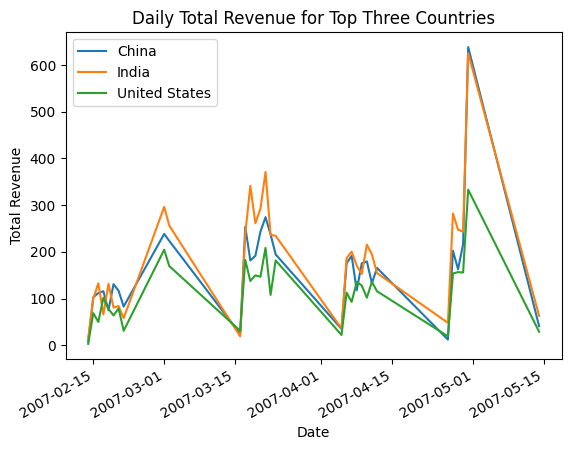

In [15]:
pivot_df.plot()
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.title('Daily Total Revenue for Top Three Countries')
plt.legend()
plt.show()

# Ques2.  Carry out a sentiment analysis on movie descriptions adding another column to the data frame that provides a sentiment classification. This can be based on a “rules based system” that you coded OR inference from a LLM such as using the API for chatgpt.

# Ques3.  Create a visual in the notebook that shows how much revenue is coming from different countries to the DVD store (you will want matplotlib).


In [16]:
grouped_df = df.groupby('country')['sales_amount'].sum().reset_index()

In [17]:
sorted_df = grouped_df.sort_values('sales_amount', ascending=False)

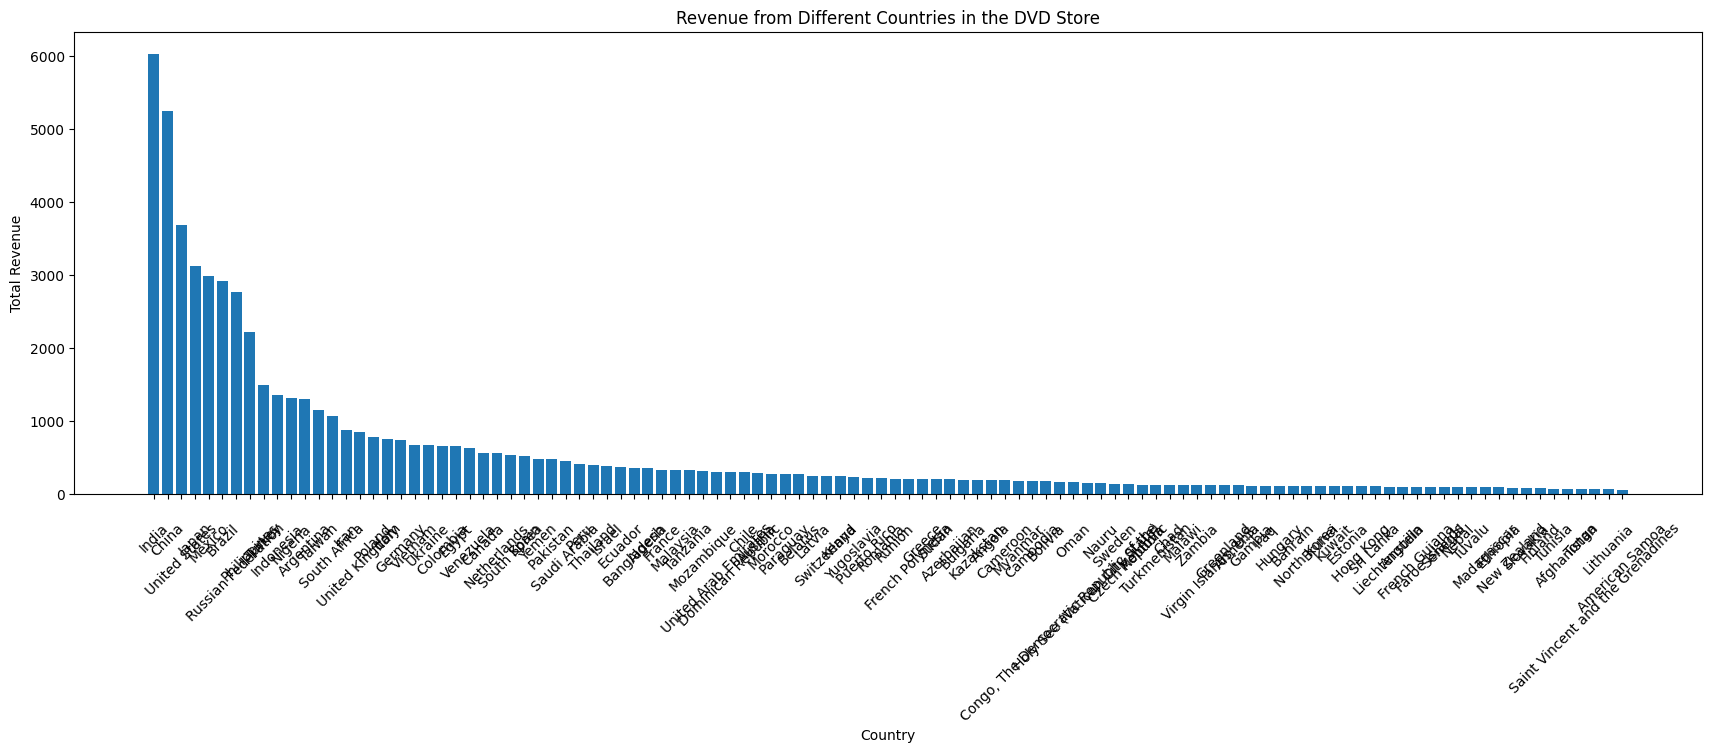

In [18]:
plt.figure(figsize=(21, 6))  # Adjust the figure size as per your preference
plt.bar(sorted_df['country'], sorted_df['sales_amount'])
plt.xlabel('Country')
plt.ylabel('Total Revenue')
plt.title('Revenue from Different Countries in the DVD Store')
plt.xticks(rotation=45)
plt.gca().xaxis.set_tick_params(pad=16)  # Increase the separation between xticks
plt.show()

# Ques4.   Do an analysis to show which actors are bringing in the most revenue (top 10 ranked)

In [19]:
df.actor = pd.read_csv ('actor.csv')

C:\Users\welco\AppData\Local\Temp\ipykernel_11612\3586879312.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.actor = pd.read_csv ('actor.csv')


In [20]:
df.film = pd.read_csv ('film.csv')

C:\Users\welco\AppData\Local\Temp\ipykernel_11612\3791829358.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.film = pd.read_csv ('film.csv')


In [21]:
df.film_actor = pd.read_csv ('film_actor.csv')

C:\Users\welco\AppData\Local\Temp\ipykernel_11612\3099263447.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.film_actor = pd.read_csv ('film_actor.csv')


In [22]:
df.actor

,actor_id,first_name,last_name,last_update
0,1,Penelope,Guiness,2013-05-26 14:47:57.62
1,2,Nick,Wahlberg,2013-05-26 14:47:57.62
2,3,Ed,Chase,2013-05-26 14:47:57.62
3,4,Jennifer,Davis,2013-05-26 14:47:57.62
4,5,Johnny,Lollobrigida,2013-05-26 14:47:57.62
...,...,...,...,...
195,196,Bela,Walken,2013-05-26 14:47:57.62
196,197,Reese,West,2013-05-26 14:47:57.62
197,198,Mary,Keitel,2013-05-26 14:47:57.62
198,199,Julia,Fawcett,2013-05-26 14:47:57.62


In [23]:
df.film

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,2013-05-26 14:50:58.951,{Trailers},'chamber':1 'fate':4 'husband':11 'italian':2 ...
1,384,Grosse Wonderful,A Epic Drama of a Cat And a Explorer who must ...,2006,1,5,4.99,49,19.99,R,2013-05-26 14:50:58.951,"{""Behind the Scenes""}",'australia':18 'cat':8 'drama':5 'epic':4 'exp...
2,8,Airport Pollock,A Epic Tale of a Moose And a Girl who must Con...,2006,1,6,4.99,54,15.99,R,2013-05-26 14:50:58.951,{Trailers},'airport':1 'ancient':18 'confront':14 'epic':...
3,98,Bright Encounters,A Fateful Yarn of a Lumberjack And a Feminist ...,2006,1,4,4.99,73,12.99,PG-13,2013-05-26 14:50:58.951,{Trailers},'boat':20 'bright':1 'conquer':14 'encount':2 ...
4,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58.951,"{""Deleted Scenes"",""Behind the Scenes""}",'academi':1 'battl':15 'canadian':20 'dinosaur...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Young Language,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,6,0.99,183,9.99,G,2013-05-26 14:50:58.951,"{Trailers,""Behind the Scenes""}",'administr':12 'boat':8 'boy':17 'databas':11 ...
996,997,Youth Kick,A Touching Drama of a Teacher And a Cat who mu...,2006,1,4,0.99,179,14.99,NC-17,2013-05-26 14:50:58.951,"{Trailers,""Behind the Scenes""}",'boat':22 'cat':11 'challeng':14 'drama':5 'ki...
997,998,Zhivago Core,A Fateful Yarn of a Composer And a Man who mus...,2006,1,6,0.99,105,10.99,NC-17,2013-05-26 14:50:58.951,"{""Deleted Scenes""}",'boy':16 'canadian':19 'compos':8 'core':2 'fa...
998,999,Zoolander Fiction,A Fateful Reflection of a Waitress And a Boat ...,2006,1,5,2.99,101,28.99,R,2013-05-26 14:50:58.951,"{Trailers,""Deleted Scenes""}",'ancient':19 'boat':11 'china':20 'discov':14 ...


In [24]:
df.film_actor

,film_id,title,description,release_year,language_id,rental_duration,rental_rate,length,replacement_cost,rating,last_update,special_features,fulltext
0,133,Chamber Italian,A Fateful Reflection of a Moose And a Husband ...,2006,1,7,4.99,117,14.99,NC-17,2013-05-26 14:50:58.951,{Trailers},'chamber':1 'fate':4 'husband':11 'italian':2 ...
1,384,Grosse Wonderful,A Epic Drama of a Cat And a Explorer who must ...,2006,1,5,4.99,49,19.99,R,2013-05-26 14:50:58.951,"{""Behind the Scenes""}",'australia':18 'cat':8 'drama':5 'epic':4 'exp...
2,8,Airport Pollock,A Epic Tale of a Moose And a Girl who must Con...,2006,1,6,4.99,54,15.99,R,2013-05-26 14:50:58.951,{Trailers},'airport':1 'ancient':18 'confront':14 'epic':...
3,98,Bright Encounters,A Fateful Yarn of a Lumberjack And a Feminist ...,2006,1,4,4.99,73,12.99,PG-13,2013-05-26 14:50:58.951,{Trailers},'boat':20 'bright':1 'conquer':14 'encount':2 ...
4,1,Academy Dinosaur,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,6,0.99,86,20.99,PG,2013-05-26 14:50:58.951,"{""Deleted Scenes"",""Behind the Scenes""}",'academi':1 'battl':15 'canadian':20 'dinosaur...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Young Language,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,6,0.99,183,9.99,G,2013-05-26 14:50:58.951,"{Trailers,""Behind the Scenes""}",'administr':12 'boat':8 'boy':17 'databas':11 ...
996,997,Youth Kick,A Touching Drama of a Teacher And a Cat who mu...,2006,1,4,0.99,179,14.99,NC-17,2013-05-26 14:50:58.951,"{Trailers,""Behind the Scenes""}",'boat':22 'cat':11 'challeng':14 'drama':5 'ki...
997,998,Zhivago Core,A Fateful Yarn of a Composer And a Man who mus...,2006,1,6,0.99,105,10.99,NC-17,2013-05-26 14:50:58.951,"{""Deleted Scenes""}",'boy':16 'canadian':19 'compos':8 'core':2 'fa...
998,999,Zoolander Fiction,A Fateful Reflection of a Waitress And a Boat ...,2006,1,5,2.99,101,28.99,R,2013-05-26 14:50:58.951,"{Trailers,""Deleted Scenes""}",'ancient':19 'boat':11 'china':20 'discov':14 ...


# Ques5.  Create a new data-frame where you classify some different countries into some categories that make sense to you (8 countries min, 20 max) in this df there will be two columns, one column will give the country name, the other column will give the classification category.

# Ques6.  Use an appropriate merge to merge that new data-frame from the last step with a dataframe from the dvd db, that gives the countries, so now countries are connected with their classification. (no need to add this table back to the postgresql db, just doing it in the notebook is fine)